<a href="https://colab.research.google.com/github/Vaishag7/DL_Bootcamp/blob/main/Handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data() ; 
len(x_train)
x_train[0].shape


(28, 28)

In [70]:
x_train = x_train/255 ; 
x_test = x_test/255 ; 

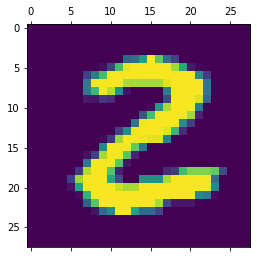

In [71]:
plt.matshow(x_train[25])

In [72]:
x_trained_flattened = x_train.reshape(len(x_train),28*28) ; 
x_tested_flattened = x_test.reshape(len(x_test),28*28) ; 

In [73]:
model = keras.Sequential([
      keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy'] 
)
model.fit(x_trained_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4708 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2832 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2728 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2664 - accuracy: 0.9257


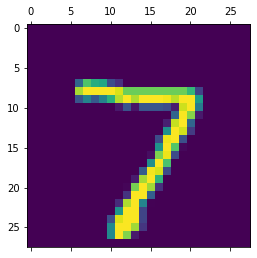

In [74]:
plt.matshow(x_test[0])

In [75]:
y_predicted = model.predict(x_tested_flattened) 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [76]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    0,    6,    5,    3,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   4,   10,  917,   15,    9,    5,   12,   10,   47,    3],
       [   4,    0,   20,  894,    0,   38,    2,   12,   31,    9],
       [   1,    2,    5,    0,  917,    0,    9,    3,    9,   36],
       [   9,    3,    2,   20,    9,  790,   13,    6,   33,    7],
       [  11,    3,    7,    0,    8,   15,  907,    2,    5,    0],
       [   1,    7,   24,    3,    8,    0,    0,  947,    3,   35],
       [   5,    9,    5,   12,   10,   25,    8,   10,  882,    8],
       [  10,    7,    1,    8,   28,    6,    0,   17,    9,  923]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

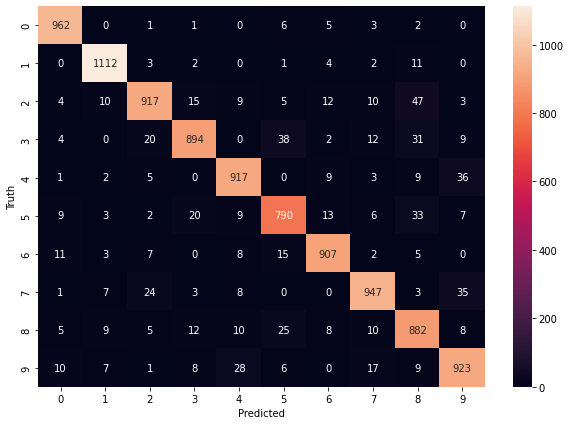

In [77]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
model = keras.Sequential([
      keras.layers.Dense(100, input_shape=(784,), activation='relu'),
      keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy'] 
)
model.fit(x_trained_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2753 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1256 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0672 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9840


313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9745


Text(69.0, 0.5, 'Truth')

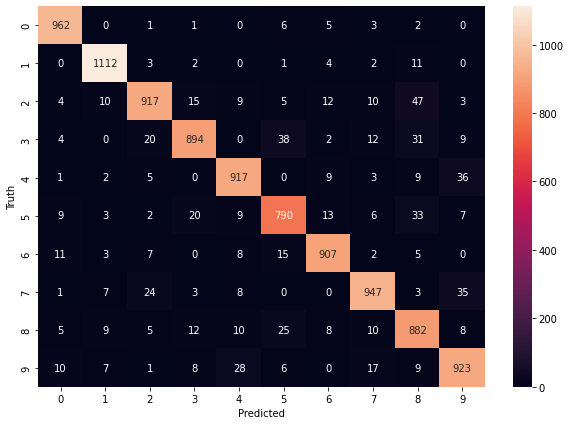

In [79]:
model.evaluate(x_tested_flattened, y_test)
y_predicted = model.predict(x_tested_flattened) 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd') 
plt.xlabel('Predicted')
plt.ylabel('Truth')